# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

**Question Answers:**

<span style="color:skyblue"> We can see that these points have low first principal component scores and high second principal component scores. Their value values in the other series: 
* series_1 = high
* series_2 = high 
* series_3 = low
</span>

<span style="color:skyblue"> We can say that series_1 & series_2 are highly correlated because we see that in the pair plots, but series_3 appears independent of the two. 



<span style="color:skyblue"> Series_1 and series_2's high correlation has an effect on PCA outputs and we can see this in PC2 2. Series_3 is independent and so its values are more apparent in PC1.


<span style="color:skyblue"> The advantages and disadvantages of the PCA graph:
* Advantages = reduces data dimensions while showing variance of the underlying data and shows outliers to investigate
* Disadvantages = strongly correlated variables are combined and so we have to check the pairplots to see these correlations
</span>

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

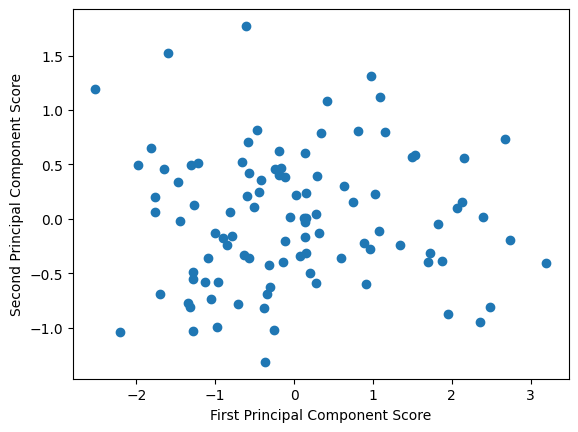

In [33]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

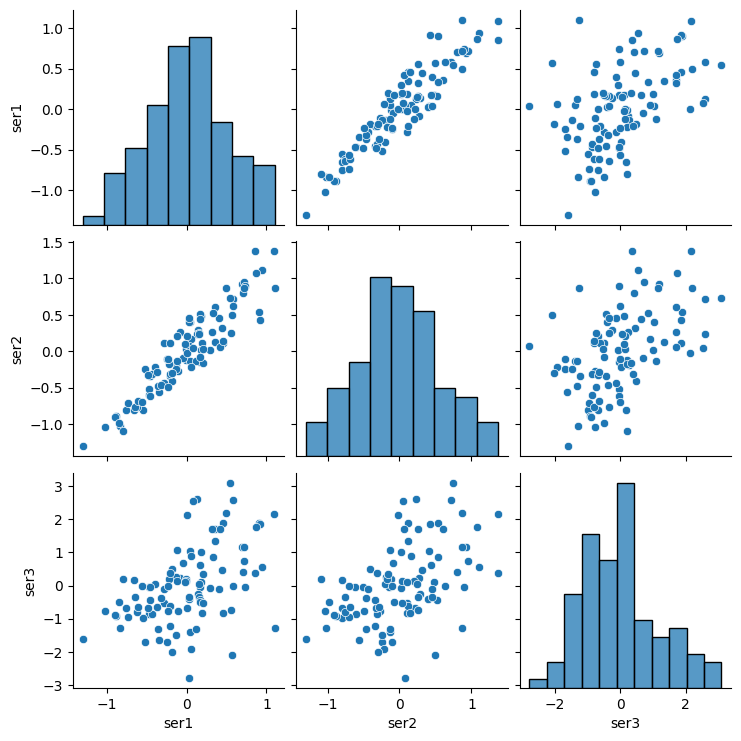

In [34]:
import seaborn as sns
sns.pairplot(df)

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [35]:
from sklearn.preprocessing import LabelEncoder
# #get the data to be used
df = pd.read_csv(r"C:\Users\james\OneDrive\Documents\James at BU\Homework\699-ModB2-Spring\699 Datasets\insurance_claims.csv")

# # 1. Drop completely empty columns
# Drop irrelevant or empty columns
df_cleaned = df.drop(columns=["_c39", "policy_number", "policy_bind_date", "incident_date", "incident_location", "insured_zip"])

# Encode categorical variables using LabelEncoder for simplicity
label_encoders = {}
for column in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column].astype(str))
    label_encoders[column] = le

# Display cleaned dataframe info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int64  
 3   policy_csl                   1000 non-null   int64  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   int64  
 8   insured_education_level      1000 non-null   int64  
 9   insured_occupation           1000 non-null   int64  
 10  insured_hobbies              1000 non-null   int64  
 11  insured_relationship         1000 non-null   int64  
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

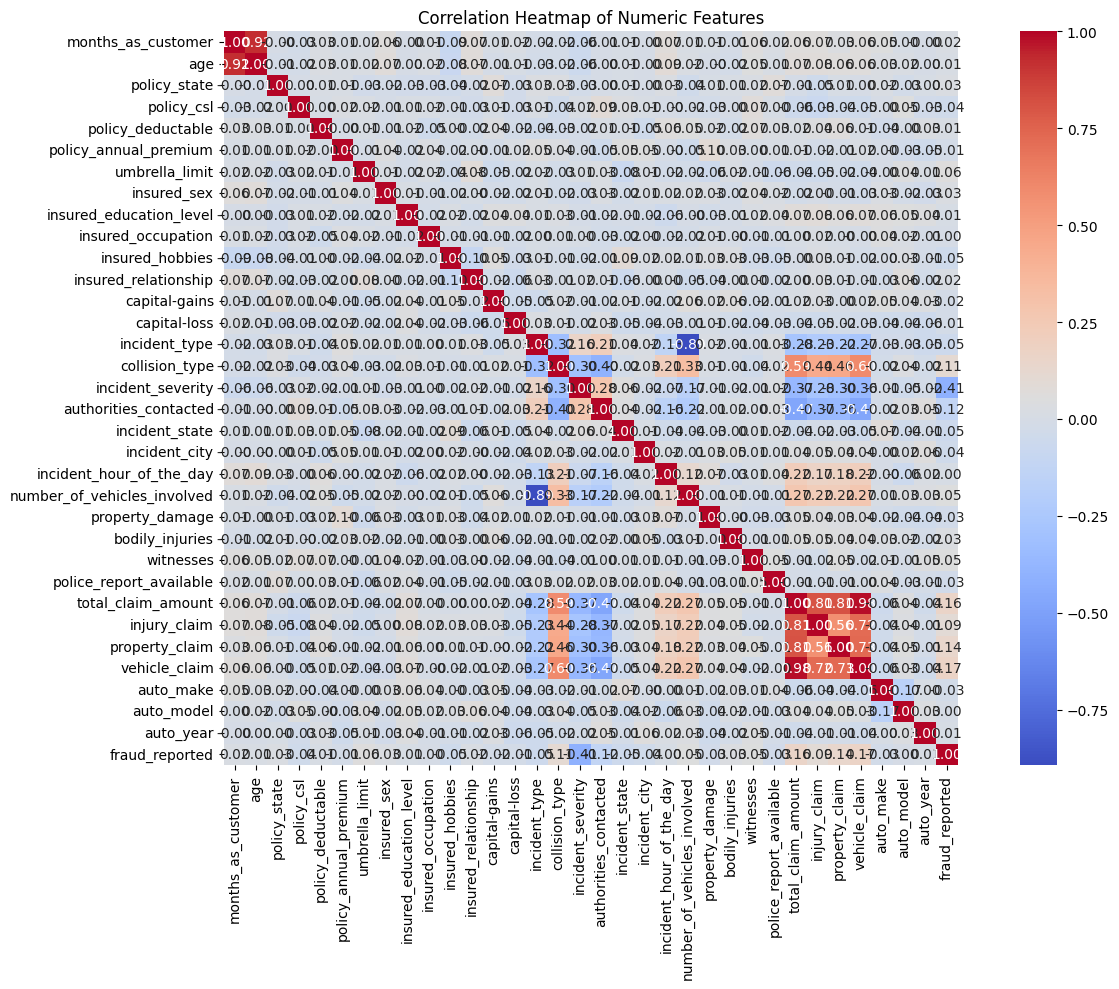

In [36]:
#get numbers
df_cleaned = df_cleaned.select_dtypes(include=['int64', 'float64'])

#do corr 
corr_matrix = df_cleaned.corr()

#do heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

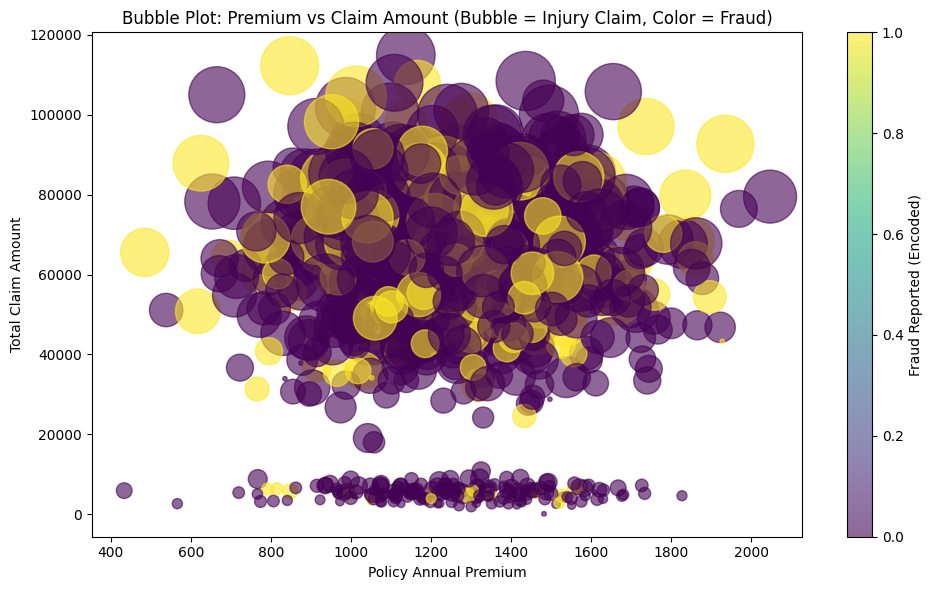

In [37]:
#bubble plot: policy_annual_premium vs total_claim_amount, bubble size = injury_claim, color = fraud_reported
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_cleaned["policy_annual_premium"],
    df_cleaned["total_claim_amount"],
    s=df_cleaned["injury_claim"] / 10 + 10,  # scale bubble size for visibility
    c=df_cleaned["fraud_reported"],
    alpha=0.6,
    cmap='viridis'
)

plt.colorbar(scatter, label="Fraud Reported (Encoded)")
plt.xlabel("Policy Annual Premium")
plt.ylabel("Total Claim Amount")
plt.title("Bubble Plot: Premium vs Claim Amount (Bubble = Injury Claim, Color = Fraud)")
plt.tight_layout()
plt.show()

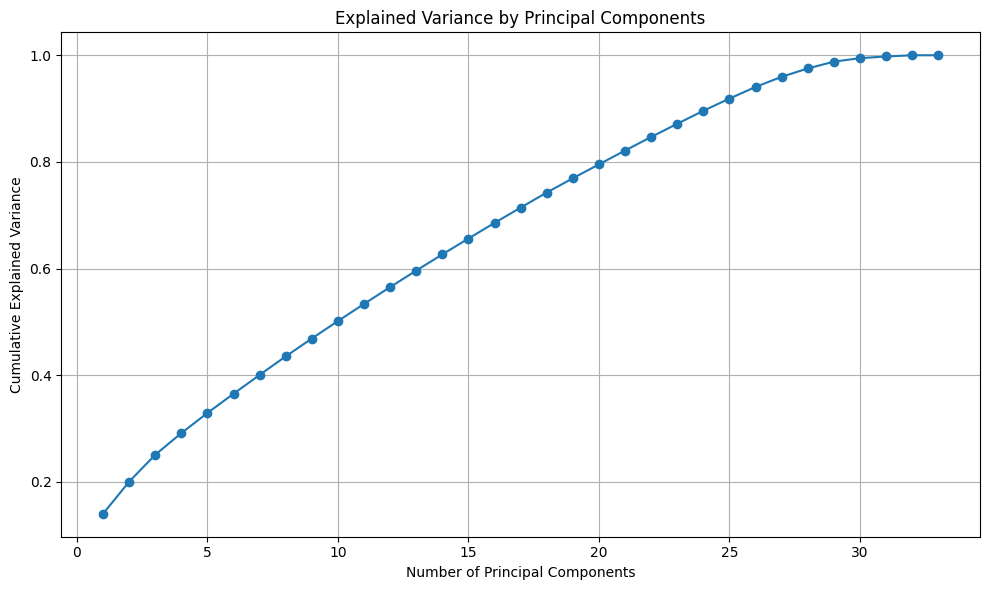

np.float64(0.14025269801768633)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

#standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.drop(columns=["fraud_reported"]))

#perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

#explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

#plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.tight_layout()
plt.show()

# Variance captured by first principal component
explained_variance[0]

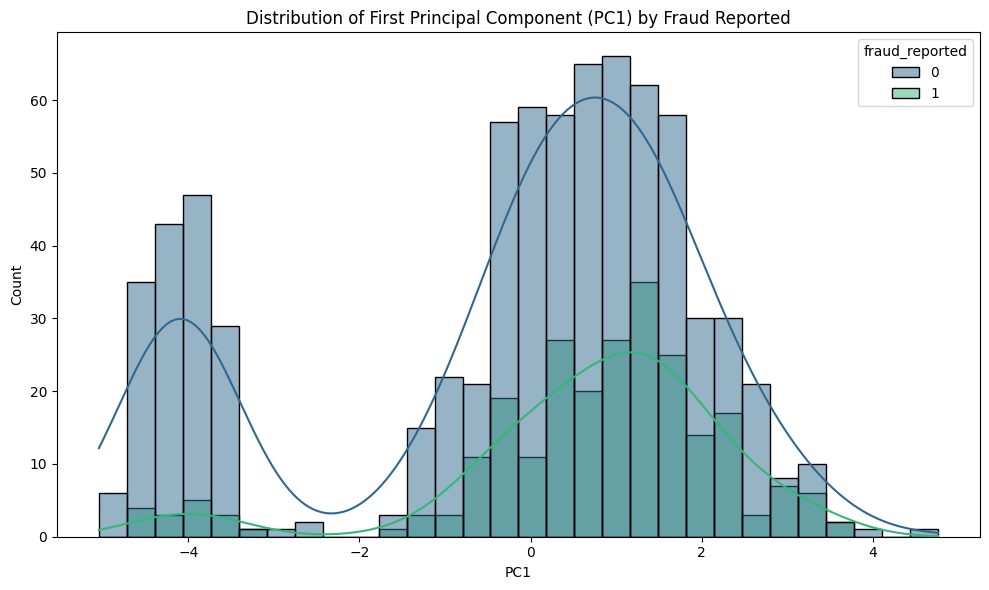

In [39]:
# compare PCA projection with fraud reported 
pc1_projection = pca_data[:, 0]

#add the projection back to a DataFrame
df_pca_projection = pd.DataFrame({
    "PC1": pc1_projection,
    "fraud_reported": df_cleaned["fraud_reported"]
})

# Visualize the distribution of PC1 colored by fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pca_projection, x="PC1", hue="fraud_reported", kde=True, bins=30, palette="viridis")
plt.title("Distribution of First Principal Component (PC1) by Fraud Reported")
plt.tight_layout()
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#correlation with target
cor_target = df_cleaned.corr()["total_claim_amount"].drop("total_claim_amount").sort_values(ascending=False)

#select top 5 features most correlated with total_claim_amount
top_features = cor_target.head(5).index.tolist()
X = df_cleaned[top_features]
y = df_cleaned["total_claim_amount"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(top_features, r2, rmse)


(['vehicle_claim',
  'property_claim',
  'injury_claim',
  'collision_type',
  'number_of_vehicles_involved'],
 1.0,
 np.float64(7.872525801285154e-11))

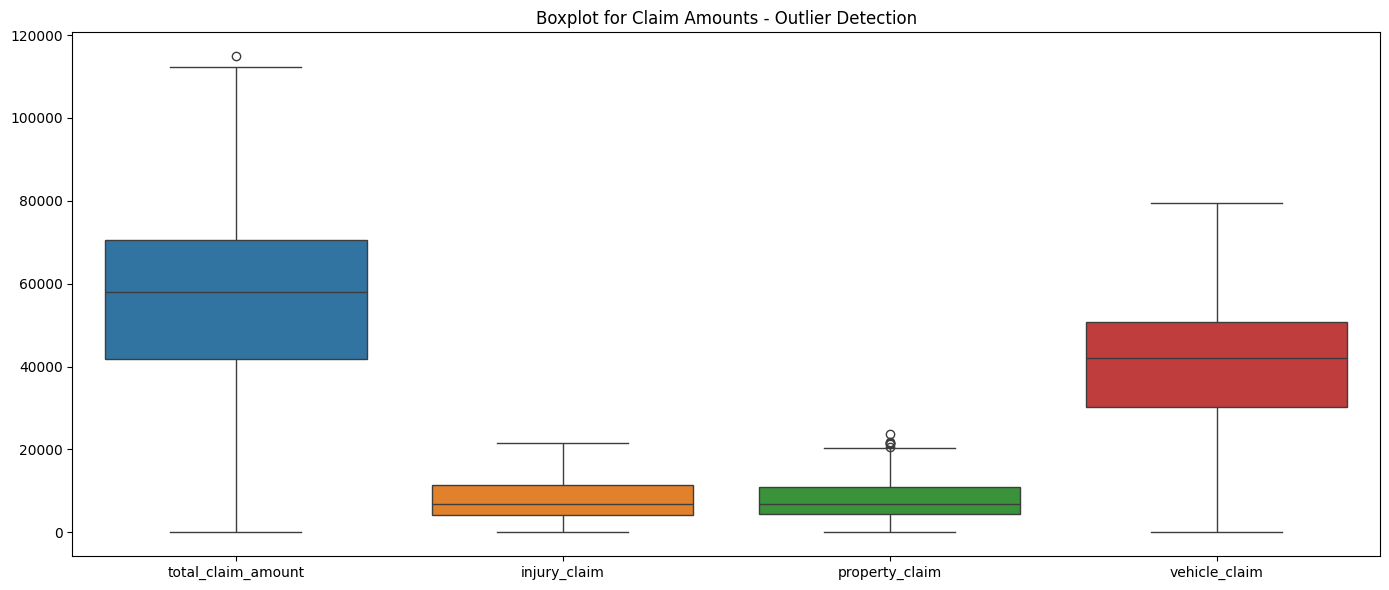

In [41]:
# Outlier detection using boxplots on key numerical features
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned[["total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"]])
plt.title("Boxplot for Claim Amounts - Outlier Detection")
plt.tight_layout()
plt.show()


**Analysis**

<span style="color:skyblue"> Although I feel that the data quality and usability are both good for this dataset, it's frustrating that no clear correlations have been revealed against the target. This is probably my impatience. There are some clear correlations and, as requested, I pursued the strongest one: total claim amount against its constituent claims: injury, property, and vehicle. Nevertheless, there are outliers present even with this strong correlation. 

<span style="color:skyblue"> As for PCA Analysis - we see that 2 principal components show 20% of the data variance. This still leaves 80% variance for the the other components and this tells us there are still complex relationships that need to be investigated.



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

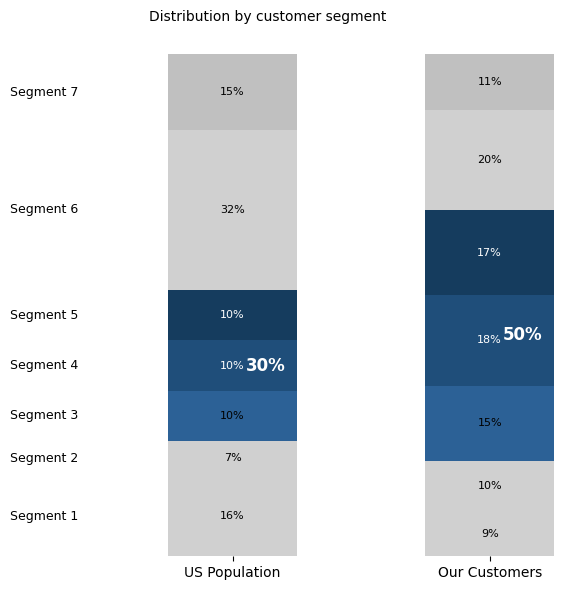

In [42]:
#This is from page 148 of the book. Note: I needed help from chatgpt and from google because I could not get the numbers to line up 
# #correctly in the bar plot. I had to reverse the order of segments and values to get it to work.

#make datra
segments = ["Segment 7", "Segment 6", "Segment 5", "Segment 4", "Segment 3", "Segment 2", "Segment 1"]
us_population = [15, 32, 10, 10, 10, 7, 16]
our_customers = [11, 20, 17, 18, 15, 10, 9]

#set the colors to approximate the image in the book. Note: I had to adjust the colors to get it to work correctly with the bar plot and text labels.
colors = {
    "Segment 7": "#c0c0c0",
    "Segment 6": "#d0d0d0",
    "Segment 5": "#153c5e",
    "Segment 4": "#1f4e7a",
    "Segment 3": "#2c6196",
    "Segment 2": "#d0d0d0",
    "Segment 1": "#d0d0d0",
}

# Positions
ind = [0, 1]
bar_width = 0.5
segments_rev = segments[::-1]
us_population_rev = us_population[::-1]
our_customers_rev = our_customers[::-1]

#set fig and axis for the bar plot
fig, ax = plt.subplots(figsize=(6, 6))

us_cum = 0
our_cum = 0
us_y_positions = []
our_y_positions = []

#plot the bars 
for i, seg in enumerate(segments_rev):
    # US Population bars
    ax.bar(ind[0], us_population_rev[i], bar_width, bottom=us_cum, color=colors[seg])
    y_center_us = us_cum + us_population_rev[i]/2
    us_y_positions.append(y_center_us)
    ax.text(ind[0], y_center_us, f"{us_population_rev[i]}%", ha='center', va='center', fontsize=8, color='white' if colors[seg].startswith('#1') else 'black')
    us_cum += us_population_rev[i]

    # Our Customers bars
    ax.bar(ind[1], our_customers_rev[i], bar_width, bottom=our_cum, color=colors[seg])
    y_center_our = our_cum + our_customers_rev[i]/2
    our_y_positions.append(y_center_our)
    ax.text(ind[1], y_center_our, f"{our_customers_rev[i]}%", ha='center', va='center', fontsize=8, color='white' if colors[seg].startswith('#1') else 'black')
    our_cum += our_customers_rev[i]

#segemt lables
for i, seg in enumerate(segments_rev):
    ax.text(ind[0] - 0.6, us_y_positions[i], seg, va='center', ha='right', fontsize=9)

#highlighted group percentages
us_midpoint = sum(us_population_rev[2:5])/2 + sum(us_population_rev[:2])
our_midpoint = sum(our_customers_rev[2:5])/2 + sum(our_customers_rev[:2])
ax.text(ind[0]+0.05, us_midpoint, "30%", va='center', ha='left', fontsize=12, weight='bold', color='white')
ax.text(ind[1]+0.05, our_midpoint, "50%", va='center', ha='left', fontsize=12, weight='bold', color='white')

#labels and formatting
ax.set_xticks(ind)
ax.set_xticklabels(["US Population", "Our Customers"])
ax.set_yticks([])
ax.set_title("Distribution by customer segment", fontsize=10, loc='left')

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

